


# Decision Trees

## Use decision trees to prepare a model to identifying risky customers on fraud data 

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

## Importing the Data

In [ ]:
Fraud_data = pd.read_csv('/content/Fraud_check.csv')
Fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Data Understanding

In [ ]:
Fraud_data.shape

(600, 6)

In [ ]:
Fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [ ]:
Fraud_data['Undergrad'] = Fraud_data['Undergrad'].astype('category')
Fraud_data['Urban'] = Fraud_data['Urban'].astype('category')
Fraud_data['Marital.Status'] = Fraud_data['Marital.Status'].astype('category')

In [ ]:
Fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
print(Fraud_data.duplicated().value_counts())

False    600
dtype: int64


In [ ]:
Fraud_data.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [ ]:
Fraud_data['Income'] = Fraud_data['Taxable.Income'].map(lambda x : 1 if x>30000 else 0)
Fraud_data['Undergrad'] = Fraud_data['Undergrad'].cat.codes
Fraud_data['Urban'] = Fraud_data['Urban'].cat.codes
Fraud_data['Marital.Status'] = Fraud_data['Marital.Status'].cat.codes
Fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


## Data Preparation

In [ ]:
X=Fraud_data.iloc[:,0:6]
y=Fraud_data['Income']
print(X)
print(y)

     Undergrad  Marital.Status  ...  Work.Experience  Urban
0            0               2  ...               10      1
1            1               0  ...               18      1
2            0               1  ...               30      1
3            1               2  ...               15      1
4            0               1  ...               28      0
..         ...             ...  ...              ...    ...
595          1               0  ...                7      1
596          1               0  ...                2      1
597          0               0  ...                0      1
598          1               1  ...               17      0
599          0               0  ...               16      0

[600 rows x 6 columns]
0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Income, Length: 600, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 6), (120, 6), (480,), (120,))

## Model Builing 

In [ ]:
dt_model=DecisionTreeClassifier()

## Finding out the best hyperparameter for building the Tree


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator = dt_model, param_grid = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12]} , cv= 5)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [ ]:
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [ ]:
grid_search.best_score_

0.9983333333333334

## Model Training

In [ ]:
dt_model=DecisionTreeClassifier(criterion='gini' , max_depth=2)

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

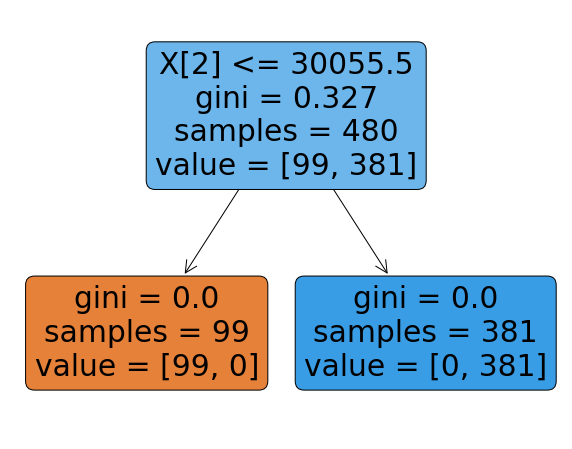

In [ ]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))
plot_tree(dt_model,filled=True, rounded=True)
plt.show()

## Model Testing

In [ ]:
y_pred_train = dt_model.predict(X_train)

In [ ]:
y_pred_test = dt_model.predict(X_test)

## Model Evaluation

## Confusion_Matrix :- To know the Misclassification done by the model

In [ ]:
accuracy_score(y_train,y_pred_train)

1.0

In [ ]:
confusion_matrix(y_train,y_pred_train)

array([[ 99,   0],
       [  0, 381]])

In [ ]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       381

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [ ]:
accuracy_score(y_test,y_pred_test)

1.0

In [ ]:
confusion_matrix(y_test,y_pred_test)

array([[25,  0],
       [ 0, 95]])

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        95

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



## Model Deployment

In [ ]:
from pickle import dump

In [ ]:
dump(dt_model, open('Decision_Trees(Fraud_check)','wb'))

In [ ]:
from pickle import load

In [ ]:
dt_model = load(open('/content/Decision_Trees(Fraud_check)','rb'))

In [ ]:
dt_model.predict(X_test)

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0])